In [186]:
from datetime import datetime
import os
import io
import re
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [305]:
def get_df (file_name, print_df=False):
    path = os.path.join(os.getcwd(), 'data', file_name)
    df = pd.read_csv(path, encoding='latin-1')
    if print_df is True:
        display(df.head())
        print(df.shape)
    return df

In [267]:
df_driver = get_df('drivers.csv', print_df=True)

driverId   driverRef number code  forename     surname         dob  \
0         1    hamilton     44  HAM     Lewis    Hamilton  1985-01-07   
1         2    heidfeld     \N  HEI      Nick    Heidfeld  1977-05-10   
2         3     rosberg      6  ROS      Nico     Rosberg  1985-06-27   
3         4      alonso     14  ALO  Fernando      Alonso  1981-07-29   
4         5  kovalainen     \N  KOV    Heikki  Kovalainen  1981-10-19   

  nationality                                             url  
0     British     http://en.wikipedia.org/wiki/Lewis_Hamilton  
1      German      http://en.wikipedia.org/wiki/Nick_Heidfeld  
2      German       http://en.wikipedia.org/wiki/Nico_Rosberg  
3     Spanish    http://en.wikipedia.org/wiki/Fernando_Alonso  
4     Finnish  http://en.wikipedia.org/wiki/Heikki_Kovalainen

(848, 9)


In [271]:
df_driver.loc[df_driver['driverId']==30]

driverId           driverRef number code forename     surname         dob  \
29        30  michael_schumacher     \N  MSC  Michael  Schumacher  1969-01-03   

   nationality                                              url  
29      German  http://en.wikipedia.org/wiki/Michael_Schumacher

In [58]:
df_race = get_df('races.csv', print_df=True)

raceId  year  round  circuitId                   name        date  \
0       1  2009      1          1  Australian Grand Prix  2009-03-29   
1       2  2009      2          2   Malaysian Grand Prix  2009-04-05   
2       3  2009      3         17     Chinese Grand Prix  2009-04-19   
3       4  2009      4          3     Bahrain Grand Prix  2009-04-26   
4       5  2009      5          4     Spanish Grand Prix  2009-05-10   

       time                                                url  
0  06:00:00  http://en.wikipedia.org/wiki/2009_Australian_G...  
1  09:00:00  http://en.wikipedia.org/wiki/2009_Malaysian_Gr...  
2  07:00:00  http://en.wikipedia.org/wiki/2009_Chinese_Gran...  
3  12:00:00  http://en.wikipedia.org/wiki/2009_Bahrain_Gran...  
4  12:00:00  http://en.wikipedia.org/wiki/2009_Spanish_Gran...

(1033, 8)


In [59]:
df_result = get_df('results.csv', print_df=True)

resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1         2      18         2              2      3     5        2   
2         3      18         3              3      7     7        3   
3         4      18         4              4      5    11        4   
4         5      18         5              1     23     3        5   

  positionText  positionOrder  points  laps         time milliseconds  \
0            1              1    10.0    58  1:34:50.616      5690616   
1            2              2     8.0    58       +5.478      5696094   
2            3              3     6.0    58       +8.163      5698779   
3            4              4     5.0    58      +17.181      5707797   
4            5              5     4.0    58      +18.014      5708630   

  fastestLap rank fastestLapTime fastestLapSpeed  statusId  
0         39    2       1:27.452         218.300         1  
1         41    3       1:27.739         217.586         1  
2         41    5       1:28.090         216.719         1  
3         58    7       1:28.603         215.464         1  
4         43    1       1:27.418         218.385         1

(24620, 18)


In [60]:
df_constr = get_df('constructors.csv', print_df=True)

constructorId constructorRef        name nationality  \
0              1        mclaren     McLaren     British   
1              2     bmw_sauber  BMW Sauber      German   
2              3       williams    Williams     British   
3              4        renault     Renault      French   
4              5     toro_rosso  Toro Rosso     Italian   

                                                 url  
0               http://en.wikipedia.org/wiki/McLaren  
1            http://en.wikipedia.org/wiki/BMW_Sauber  
2  http://en.wikipedia.org/wiki/Williams_Grand_Pr...  
3  http://en.wikipedia.org/wiki/Renault_in_Formul...  
4   http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso

(210, 5)


In [61]:
df_constr_result = get_df('constructor_results.csv', print_df=True)

constructorResultsId  raceId  constructorId  points status
0                     1      18              1    14.0     \N
1                     2      18              2     8.0     \N
2                     3      18              3     9.0     \N
3                     4      18              4     5.0     \N
4                     5      18              5     2.0     \N

(11560, 5)


In [62]:
df_constr_stand = get_df('constructor_standings.csv', print_df=True)

constructorStandingsId  raceId  constructorId  points  position  \
0                       1      18              1    14.0         1   
1                       2      18              2     8.0         3   
2                       3      18              3     9.0         2   
3                       4      18              4     5.0         4   
4                       5      18              5     2.0         5   

  positionText  wins  
0            1     1  
1            3     0  
2            2     0  
3            4     0  
4            5     0

(12326, 7)


### Add win column

In [291]:
df = get_df('results.csv')
df['win'] = 0
df['win'] = df['position'].mask(df_result['position'] != '1', 0)
display(df.head())
print(df.shape)

resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1         2      18         2              2      3     5        2   
2         3      18         3              3      7     7        3   
3         4      18         4              4      5    11        4   
4         5      18         5              1     23     3        5   

  positionText  positionOrder  points  laps         time milliseconds  \
0            1              1    10.0    58  1:34:50.616      5690616   
1            2              2     8.0    58       +5.478      5696094   
2            3              3     6.0    58       +8.163      5698779   
3            4              4     5.0    58      +17.181      5707797   
4            5              5     4.0    58      +18.014      5708630   

  fastestLap rank fastestLapTime fastestLapSpeed  statusId  
0         39    2       1:27.452         218.300         1  
1         41    3       1:27.739         217.586         1  
2         41    5       1:28.090         216.719         1  
3         58    7       1:28.603         215.464         1  
4         43    1       1:27.418         218.385         1

(24620, 18)


resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1         2      18         2              2      3     5        2   
2         3      18         3              3      7     7        3   
3         4      18         4              4      5    11        4   
4         5      18         5              1     23     3        5   

  positionText  positionOrder  points  laps         time milliseconds  \
0            1              1    10.0    58  1:34:50.616      5690616   
1            2              2     8.0    58       +5.478      5696094   
2            3              3     6.0    58       +8.163      5698779   
3            4              4     5.0    58      +17.181      5707797   
4            5              5     4.0    58      +18.014      5708630   

  fastestLap rank fastestLapTime fastestLapSpeed  statusId win  
0         39    2       1:27.452         218.300         1   1  
1         41    3       1:27.739         217.586         1   0  
2         41    5       1:28.090         216.719         1   0  
3         58    7       1:28.603         215.464         1   0  
4         43    1       1:27.418         218.385         1   0

(24620, 19)


### Top drivers in history

In [64]:
n_wins = df_result.loc[df['position'] == str(1)]
n_wins_driver = n_wins.groupby('driverId')['driverId'].count()
n_wins_driver.head()

driverId
1    84
3    23
4    32
5     1
8    21
Name: driverId, dtype: int64

In [65]:
n_wins_top_10 = n_wins_driver.nlargest(10)
n_wins_top_10.head()

driverId
30     91
1      84
20     53
117    51
102    41
Name: driverId, dtype: int64

In [66]:
names = []
for Id in n_wins_top_10.index:
    names.append(df_driver.loc[df_driver['driverId'] == Id, 'surname'].values[0])
print(names)

['Schumacher', 'Hamilton', 'Vettel', 'Prost', 'Senna', 'Alonso', 'Mansell', 'Stewart', 'Lauda', 'Clark']


<BarContainer object of 10 artists>

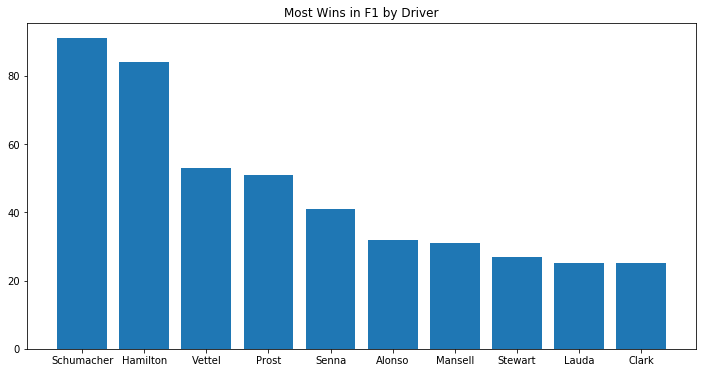

In [67]:
plt.rcParams["figure.figsize"] = (12,6)
plt.title('Most Wins in F1 by Driver')
plt.bar(names, n_wins_top_10)

### Top constructors in history

In [68]:
n_wins_constructor = n_wins.groupby('constructorId')['constructorId'].count()
n_wins_constructor.head()

constructorId
1    178
2      1
3    114
4     35
5      1
Name: constructorId, dtype: int64

In [69]:
n_wins_top_10c = n_wins_constructor.nlargest(10)
n_wins_top_10c.head()

constructorId
6      239
1      178
3      114
131    102
9       62
Name: constructorId, dtype: int64

In [70]:
names_c = []
for Id in n_wins_top_10c.index:
      names_c.append(df_constr.loc[df_constr['constructorId'] == Id, 'name'].values[0])
print(names_c)

['Ferrari', 'McLaren', 'Williams', 'Mercedes', 'Red Bull', 'Team Lotus', 'Renault', 'Benetton', 'Tyrrell', 'Brabham']


<BarContainer object of 10 artists>

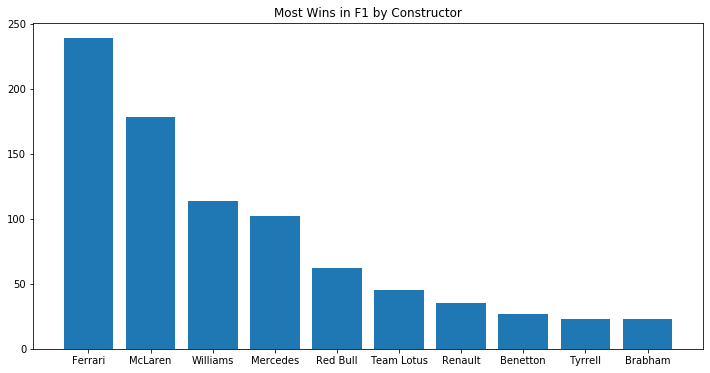

In [71]:
plt.rcParams["figure.figsize"] = (12,6)
plt.title('Most Wins in F1 by Constructor')
plt.bar(names_c, n_wins_top_10c)

### Label: time from first position

In [144]:
df_race = get_df('races.csv')
year=[]
for raceId in df_race['raceId']:
    year.append(df_race.loc[df_race['raceId'] == raceId, 'year'].values[0])

raceId  year  round  circuitId                   name        date  \
0       1  2009      1          1  Australian Grand Prix  2009-03-29   
1       2  2009      2          2   Malaysian Grand Prix  2009-04-05   
2       3  2009      3         17     Chinese Grand Prix  2009-04-19   
3       4  2009      4          3     Bahrain Grand Prix  2009-04-26   
4       5  2009      5          4     Spanish Grand Prix  2009-05-10   

       time                                                url  
0  06:00:00  http://en.wikipedia.org/wiki/2009_Australian_G...  
1  09:00:00  http://en.wikipedia.org/wiki/2009_Malaysian_Gr...  
2  07:00:00  http://en.wikipedia.org/wiki/2009_Chinese_Gran...  
3  12:00:00  http://en.wikipedia.org/wiki/2009_Bahrain_Gran...  
4  12:00:00  http://en.wikipedia.org/wiki/2009_Spanish_Gran...

(1033, 8)


In [145]:
df_race['year'] = year
df_race['year'].unique()

array([2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999,
       1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 2010, 1989,
       1988, 1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979, 1978,
       1977, 1976, 1975, 1974, 1973, 1972, 1971, 1970, 1969, 1968, 1967,
       1966, 1965, 1964, 1963, 1962, 1961, 1960, 1959, 1958, 1957, 1956,
       1955, 1954, 1953, 1952, 1951, 1950, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020])

In [146]:
time_from_first = []
current_time = 0

for index, row in df.iterrows():
    if row['milliseconds'] == '\\N':
        time_from_first.append(1000000)
    elif int(row['positionOrder']) == 1:
        time_from_first.append(0)
        current_time = int(row['milliseconds'])
    else:
        time_from_first.append(int(row['milliseconds']) - current_time)
  

resultId  raceId  driverId  constructorId number  grid position  \
0             1      18         1              1     22     1        1   
1             2      18         2              2      3     5        2   
2             3      18         3              3      7     7        3   
3             4      18         4              4      5    11        4   
4             5      18         5              1     23     3        5   
...         ...     ...       ...            ...    ...   ...      ...   
24615     24621    1030       841             51     99    16       16   
24616     24622    1030       847              3     63    18       17   
24617     24623    1030       842              5     10    11       18   
24618     24624    1030         9              3     88    19       19   
24619     24625    1030       840            211     18    12       \N   

      positionText  positionOrder  points  laps         time milliseconds  \
0                1              1    10.0    58  1:34:50.616      5690616   
1                2              2     8.0    58       +5.478      5696094   
2                3              3     6.0    58       +8.163      5698779   
3                4              4     5.0    58      +17.181      5707797   
4                5              5     4.0    58      +18.014      5708630   
...            ...            ...     ...   ...          ...          ...   
24615           16             16     0.0    54           \N           \N   
24616           17             17     0.0    54           \N           \N   
24617           18             18     0.0    53           \N           \N   
24618           19             19     0.0    53           \N           \N   
24619            R             20     0.0    45           \N           \N   

      fastestLap rank fastestLapTime fastestLapSpeed  statusId win  \
0             39    2       1:27.452         218.300         1   1   
1             41    3       1:27.739         217.586         1   0   
2             41    5       1:28.090         216.719         1   0   
3             58    7       1:28.603         215.464         1   0   
4             43    1       1:27.418         218.385         1   0   
...          ...  ...            ...             ...       ...  ..   
24615         28   15       1:43.256         193.639        11   0   
24616         50   13       1:43.074         193.981        11   0   
24617         53   10       1:42.414         195.231        12   0   
24618         51   20       1:44.500         191.333        12   0   
24619         25   17       1:43.326         193.507        23   0   

       Time_From_First  
0                    0  
1                 5478  
2                 8163  
3                17181  
4                18014  
...                ...  
24615          1000000  
24616          1000000  
24617          1000000  
24618          1000000  
24619          1000000  

[24620 rows x 20 columns]

In [332]:
df_result = get_df('results.csv')
mask = (df_result['fastestLapTime'] != 0)
races = df_result['raceId'].unique()

df_result['min_fastest_lap_time'] = 0
df_result['min_fastest_lap_speed'] = 0
df_result['avg_fastest_lap_time'] = 0
df_result['avg_fastest_lap_speed'] = 0
df_result['max_fastest_lap_time'] = 0
df_result['max_fastest_lap_speed'] = 0

missing_time = []
for race in races:
    set_time = df_result.loc[(df_result['raceId']==race) &\
                          (df_result['fastestLapTime']!='\\N')]
    times = set_time['fastestLapTime']
    speeds = set_time['fastestLapSpeed']
    
#     print(times)
    count = times.size
    
    if count is 0:
        missing_time.append(race)
    else:
        avg_time = 0
        avg_speed = 0
        
        # Change time strings to time in seconds
        for i, row in set_time.iterrows():
            timestring = row['fastestLapTime']
            time_list = re.split(':', timestring)
            sec_time = float(time_list[0]) * 60 + float(time_list[1])
            
            df_result.loc[(df_result['fastestLapTime'] == timestring) &
                          (df_result['raceId'] == race), 'fastestLapTime'] = sec_time
            avg_time += sec_time
        
        # Find avg fastest lap time
        avg_time = avg_time / count
        avg_times[race] = avg_time
        mask = (df_result['raceId']==race)
        df_result.loc[mask, 'avg_fastest_lap_time'] = avg_time
        
        # Find slowest overall lap time
        set_time = df_result.loc[(df_result['raceId']==race) &\
                          (df_result['fastestLapTime']!='\\N')]
        times = set_time['fastestLapTime']
        max_time = times.max()
        df_result.loc[mask, 'max_fastest_lap_time'] = max_time
        
        # Find fastest overall lap time
        min_time = times.min()
        df_result.loc[mask, 'min_fastest_lap_time'] = min_time
        
        all_starters = df_result.loc[df_result['raceId']==race]
        
        # Find avg fastest lap speed
        for speed in speeds:
            avg_speed += float(speed)
        avg_speed = avg_speed / count
        df_result.loc[mask, 'avg_fastest_lap_speed'] = avg_speed
        
        # Find max overall fastest speed
        max_speed = speeds.max()
        df_result.loc[mask, 'max_fastest_lap_speed'] = max_speed
        
        # Find max overall fastest speed
        min_speed = speeds.min()
        df_result.loc[mask, 'min_fastest_lap_speed'] = min_speed
    
#         winner = df_result.loc[(df_result['raceId']==race) &\
#                               (df_result['fastestLapTime']!=0) & (df_result['win']==1)]
        

print(len(missing_time), ' races are missing fastest lap data')

713  races are missing fastest lap data


In [333]:
# No timing data available from 1950 to 2003, so these years are removed
years = []
for race in missing_time:
    no_times = df_race.loc[df_race['raceId']==race]
    year = no_times['year'].unique()[0]
    if year not in years:
        years.append(year)
        
print(years)

[2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989, 1988, 1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979, 1978, 1977, 1976, 1975, 1974, 1973, 1972, 1971, 1970, 1969, 1968, 1967, 1966, 1965, 1964, 1963, 1962, 1961, 1960, 1959, 1958, 1957, 1956, 1955, 1954, 1953, 1952, 1951, 1950]


In [334]:
# filter out races with no timing data
for race in missing_time:
    df_result = df_result.loc[df_result['raceId'] != race]
    
display(df_result.shape)

(6511, 24)

In [335]:
display(df_result)

resultId  raceId  driverId  constructorId number  grid position  \
0             1      18         1              1     22     1        1   
1             2      18         2              2      3     5        2   
2             3      18         3              3      7     7        3   
3             4      18         4              4      5    11        4   
4             5      18         5              1     23     3        5   
...         ...     ...       ...            ...    ...   ...      ...   
24615     24621    1030       841             51     99    16       16   
24616     24622    1030       847              3     63    18       17   
24617     24623    1030       842              5     10    11       18   
24618     24624    1030         9              3     88    19       19   
24619     24625    1030       840            211     18    12       \N   

      positionText  positionOrder  points  ...  rank fastestLapTime  \
0                1              1    10.0  ...     2         87.452   
1                2              2     8.0  ...     3         87.739   
2                3              3     6.0  ...     5          88.09   
3                4              4     5.0  ...     7         88.603   
4                5              5     4.0  ...     1         87.418   
...            ...            ...     ...  ...   ...            ...   
24615           16             16     0.0  ...    15        103.256   
24616           17             17     0.0  ...    13        103.074   
24617           18             18     0.0  ...    10        102.414   
24618           19             19     0.0  ...    20          104.5   
24619            R             20     0.0  ...    17        103.326   

      fastestLapSpeed statusId min_fastest_lap_time min_fastest_lap_speed  \
0             218.300        1               87.418               207.461   
1             217.586        1               87.418               207.461   
2             216.719        1               87.418               207.461   
3             215.464        1               87.418               207.461   
4             218.385        1               87.418               207.461   
...               ...      ...                  ...                   ...   
24615         193.639       11               99.283               191.333   
24616         193.981       11               99.283               191.333   
24617         195.231       12               99.283               191.333   
24618         191.333       12               99.283               191.333   
24619         193.507       23               99.283               191.333   

      avg_fastest_lap_time  avg_fastest_lap_speed  max_fastest_lap_time  \
0                89.100529             214.306647                92.021   
1                89.100529             214.306647                92.021   
2                89.100529             214.306647                92.021   
3                89.100529             214.306647                92.021   
4                89.100529             214.306647                92.021   
...                    ...                    ...                   ...   
24615           102.185950             195.705200               104.500   
24616           102.185950             195.705200               104.500   
24617           102.185950             195.705200               104.500   
24618           102.185950             195.705200               104.500   
24619           102.185950             195.705200               104.500   

      max_fastest_lap_speed  
0                   218.385  
1                   218.385  
2                   218.385  
3                   218.385  
4                   218.385  
...                     ...  
24615               201.387  
24616               201.387  
24617               201.387  
24618               201.387  
24619               201.387  

[6511 rows x 24 columns]

In [353]:
df_result['fastest_time_delta'] = 0
df_result['fastest_speed_delta'] = 0
df_result['avg_time_delta'] = 0
df_result['avg_speed_delta'] = 0
df_result['gained_pos'] = 0

# remove dns/first lap crashes for now since this may bias data
# TODO: consider adding dns/first lap crashes back in (use null_mask)
# null_mask = (df_result['fastestLapTime']=='\\N')
mask = (df_result['fastestLapTime']!='\\N')
df_thin = df_result.loc[mask]

# Coerce columns to float
df_thin['fastestLapTime'] = df_thin['fastestLapTime'].astype(float)
df_thin['fastestLapSpeed'] = df_thin['fastestLapSpeed'].astype(float)
df_thin['min_fastest_lap_speed'] = df_thin['min_fastest_lap_speed'].astype(float)
df_thin['max_fastest_lap_speed'] = df_thin['max_fastest_lap_speed'].astype(float)

# Deltas are in percentages above fastest lap time
df_thin['fastest_time_delta'] = df_thin['fastestLapTime'] / df_thin['min_fastest_lap_time']

# Deltas are in percentages above fastest lap speed
df_thin['fastest_speed_delta'] = df_thin['fastestLapSpeed'] / df_thin['max_fastest_lap_speed']

# Deltas are in percentages w.r.t avg fastest lap time
df_thin['avg_time_delta'] = df_thin['fastestLapTime'] / df_thin['avg_fastest_lap_time']

# Deltas are in percentages above avg fastest lap speed
df_thin['avg_speed_delta'] = df_thin['fastestLapSpeed'] / df_thin['avg_fastest_lap_speed']

# Positions gained
df_thin['gained_pos'] = df_thin['positionOrder'] - df_thin['grid']

/home/edie/miniconda3/envs/env_lab/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/edie/miniconda3/envs/env_lab/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/home/edie/miniconda3/envs/env_lab/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [380]:
years = list(range(2004, 2020))

# get dict of raceId by round by year
year_dict = {}
df_race = get_df('races.csv')
for year in years:
    df_year = df_race.loc[df_race['year']==year]
    
    round_dict = {}
    rounds = df_year['round'].unique()
    for rnd in rounds:
        raceId = df_race.loc[(df_race['year']==year) & (df_race['round']==rnd)]['raceId'].unique()
        round_dict[rnd] = raceId[0]
    year_dict[year] = round_dict
    

In [388]:

df_prev = None
for year in year_dict.keys():
    for rnd in year_dict[year].keys():
        
        if rnd is not 1:
            # drop first rounds
            raceId = year_dict[year][rnd]
            race_data = df_thin.loc[df_thin['raceId']==(raceId-1)]
            race_data['current_id'] = raceId
            
            if df_prev is None:
                # Initial df assignment
                df_prev = race_data
            else:
                df_prev = pd.concat([df_prev, race_data])

/home/edie/miniconda3/envs/env_lab/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [387]:
display(df_prev)

resultId  raceId  driverId  constructorId number  grid position  \
1494       1495      89         4              4      5     1        1   
1495       1496      89         8              1      9     3        2   
1496       1497      89        23              7     17     9        3   
1497       1498      89        21              4      6     2        4   
1498       1499      89        32              9     15    14        5   
...         ...     ...       ...            ...    ...   ...      ...   
24595     24601    1029         9              3     88    19       16   
24596     24602    1029        20              6      5     2       17   
24597     24603    1029       844              6     16    14       18   
24598     24604    1029       840            211     18    17       19   
24599     24605    1029       822            131     77     4       \N   

      positionText  positionOrder  points  ...  avg_fastest_lap_time  \
1494             1              1    10.0  ...              94.97425   
1495             2              2     8.0  ...              94.97425   
1496             3              3     6.0  ...              94.97425   
1497             4              4     5.0  ...              94.97425   
1498             5              5     4.0  ...              94.97425   
...            ...            ...     ...  ...                   ...   
24595           16             16     0.0  ...              72.46415   
24596           17             17     0.0  ...              72.46415   
24597           18             18     0.0  ...              72.46415   
24598           19             19     0.0  ...              72.46415   
24599            R             20     0.0  ...              72.46415   

      avg_fastest_lap_speed max_fastest_lap_time max_fastest_lap_speed  \
1494              206.65365               97.398               210.458   
1495              206.65365               97.398               210.458   
1496              206.65365               97.398               210.458   
1497              206.65365               97.398               210.458   
1498              206.65365               97.398               210.458   
...                     ...                  ...                   ...   
24595             214.11325               74.553               219.417   
24596             214.11325               74.553               219.417   
24597             214.11325               74.553               219.417   
24598             214.11325               74.553               219.417   
24599             214.11325               74.553               219.417   

      fastest_time_delta  fastest_speed_delta  avg_time_delta  \
1494            1.003153             0.996859        0.984856   
1495            1.000000             1.000000        0.981761   
1496            1.008505             0.991571        0.990110   
1497            1.003443             0.996569        0.985141   
1498            1.005202             0.994826        0.986867   
...                  ...                  ...             ...   
24595           1.054528             0.948295        1.028826   
24596           1.009703             0.990393        0.985094   
24597           1.010255             0.989850        0.985632   
24598           1.026946             0.973762        1.001916   
24599           1.000000             1.000000        0.975627   

       avg_speed_delta  gained_pos  current_id  
1494          1.015211           0          90  
1495          1.018409          -1          90  
1496          1.009825          -6          90  
1497          1.014916           2          90  
1498          1.013140          -9          90  
...                ...         ...         ...  
24595         0.971785          -3        1030  
24596         1.014926          15        1030  
24597         1.014370           4        1030  
24598         0.997883           2        1030  
24599         1.024771          16        10

In [383]:
display(df_prev)

resultId  raceId  driverId  constructorId number  grid position  \
1494       1495      89         4              4      5     1        1   
1495       1496      89         8              1      9     3        2   
1496       1497      89        23              7     17     9        3   
1497       1498      89        21              4      6     2        4   
1498       1499      89        32              9     15    14        5   
...         ...     ...       ...            ...    ...   ...      ...   
24595     24601    1029         9              3     88    19       16   
24596     24602    1029        20              6      5     2       17   
24597     24603    1029       844              6     16    14       18   
24598     24604    1029       840            211     18    17       19   
24599     24605    1029       822            131     77     4       \N   

      positionText  positionOrder  points  ...  min_fastest_lap_speed  \
1494             1              1    10.0  ...                201.478   
1495             2              2     8.0  ...                201.478   
1496             3              3     6.0  ...                201.478   
1497             4              4     5.0  ...                201.478   
1498             5              5     4.0  ...                201.478   
...            ...            ...     ...  ...                    ...   
24595           16             16     0.0  ...                208.072   
24596           17             17     0.0  ...                208.072   
24597           18             18     0.0  ...                208.072   
24598           19             19     0.0  ...                208.072   
24599            R             20     0.0  ...                208.072   

      avg_fastest_lap_time avg_fastest_lap_speed max_fastest_lap_time  \
1494              94.97425             206.65365               97.398   
1495              94.97425             206.65365               97.398   
1496              94.97425             206.65365               97.398   
1497              94.97425             206.65365               97.398   
1498              94.97425             206.65365               97.398   
...                    ...                   ...                  ...   
24595             72.46415             214.11325               74.553   
24596             72.46415             214.11325               74.553   
24597             72.46415             214.11325               74.553   
24598             72.46415             214.11325               74.553   
24599             72.46415             214.11325               74.553   

      max_fastest_lap_speed  fastest_time_delta  fastest_speed_delta  \
1494                210.458            1.003153             0.996859   
1495                210.458            1.000000             1.000000   
1496                210.458            1.008505             0.991571   
1497                210.458            1.003443             0.996569   
1498                210.458            1.005202             0.994826   
...                     ...                 ...                  ...   
24595               219.417            1.054528             0.948295   
24596               219.417            1.009703             0.990393   
24597               219.417            1.010255             0.989850   
24598               219.417            1.026946             0.973762   
24599               219.417            1.000000             1.000000   

       avg_time_delta  avg_speed_delta  gained_pos  
1494         0.984856         1.015211           0  
1495         0.981761         1.018409          -1  
1496         0.990110         1.009825          -6  
1497         0.985141         1.014916           2  
1498         0.986867         1.013140          -9  
...               ...              ...         ...  
24595        1.028826         0.971785          -3  
24596        0.985094         1.014926          15  
24597        0.985632 

In [234]:
# mask = (df_result['fastestLapTime'] != 0)
# valid = [mask]
mask = (df_result['raceId']==18) & (df_result['fastestLapTime']!=0)
valid = df_result[mask]

# df_result['fastest_time_pct'] = 0
df_result.loc[mask, 'fastestLapTime'] = '00:0' + str(df_result['fastestLapTime'])
df_result.loc[mask, 'fastest_lap_sec'] = pd.to_timedelta(df_result['fastestLapTime'])\
                                   .dt.total_seconds()\
                                   .map('{:,.2f}'.format)
df_result['fastest_lap_sec'] = 0
# df_result.loc[mask, 'fastest_lap_sec'] = re.split(':', df_result['fastestLapTime'])[0] * 60 +\
#     re.split(':', df_result['fastestLapTime'])[1]
# df_result['fastestLapTime'] = df_result['fastestLapTime'].apply(lambda x: '00:0'+str(x))

display(df_result)

# times = df_result.loc[(df_result['raceId']==18) & (df_result['fastestLapTime']!=0)]['fastestLapTime']
# avg_time = 0
# for timestring in times:
#     time_list = re.split(':', timestring)
#     avg_time += float(time_list[0]) * 60 + float(time_list[1])

# print(times)
# print(avg_time/times.size)

# df_result.loc[(df_result['raceId']==18) & (df_result['fastestLapTime']!=0)]['fastestLapTime']

# mask = (df_result['raceId']==18) & (df_result['fastestLapTime']!=0)
# valid = df_result[mask]

# df_result['fastest_time_pct'] = 0
# df_result.loc[mask, 'fastest_time_pct'] = z_valid['a'] / np.log(z_valid['b'])

# non_null = times.loc[]
# times.loc[df_result.fastestLapTime=='\\N', 'fastestLapTime'] = 0
# print(times)
for i, row in df_result.iterrows():
    

ValueError: invalid unit abbreviation: 


In [235]:
display(df_result)


resultId  raceId  driverId  constructorId number  grid position  \
0             1      18         1              1     22     1        1   
1             2      18         2              2      3     5        2   
2             3      18         3              3      7     7        3   
3             4      18         4              4      5    11        4   
4             5      18         5              1     23     3        5   
...         ...     ...       ...            ...    ...   ...      ...   
24615     24621    1030       841             51     99    16       16   
24616     24622    1030       847              3     63    18       17   
24617     24623    1030       842              5     10    11       18   
24618     24624    1030         9              3     88    19       19   
24619     24625    1030       840            211     18    12       \N   

      positionText  positionOrder  points  laps         time milliseconds  \
0                1              1    10.0    58  1:34:50.616      5690616   
1                2              2     8.0    58       +5.478      5696094   
2                3              3     6.0    58       +8.163      5698779   
3                4              4     5.0    58      +17.181      5707797   
4                5              5     4.0    58      +18.014      5708630   
...            ...            ...     ...   ...          ...          ...   
24615           16             16     0.0    54           \N           \N   
24616           17             17     0.0    54           \N           \N   
24617           18             18     0.0    53           \N           \N   
24618           19             19     0.0    53           \N           \N   
24619            R             20     0.0    45           \N           \N   

      fastestLap rank                                     fastestLapTime  \
0             39    2  00:00        1:27.452\n1        1:27.739\n2   ...   
1             41    3  00:00        1:27.452\n1        1:27.739\n2   ...   
2             41    5  00:00        1:27.452\n1        1:27.739\n2   ...   
3             58    7  00:00        1:27.452\n1        1:27.739\n2   ...   
4             43    1  00:00        1:27.452\n1        1:27.739\n2   ...   
...          ...  ...                                                ...   
24615         28   15                                           1:43.256   
24616         50   13                                           1:43.074   
24617         53   10                                           1:42.414   
24618         51   20                                           1:44.500   
24619         25   17                                           1:43.326   

      fastestLapSpeed  statusId  
0             218.300         1  
1             217.586         1  
2             216.719         1  
3             215.464         1  
4             218.385         1  
...               ...       ...  
24615         193.639        11  
24616         193.981        11  
24617         195.231        12  
24618         191.333        12  
24619         193.507        23  

[24620 rows x 18 columns]

In [176]:
s = df_result
s.loc[df_result.fastestLapTime=='\\N', 'fastestLapTime'] = 0
display(s.loc[df_result.fastestLapTime=='\\N', 'fastestLapTime'])

Series([], Name: fastestLapTime, dtype: object)

### Bind race IDs with circuits

In [263]:
group = df_result.groupby('name')
display(group.head())
# races_u = group.apply(lambda x: x['raceId'].unique())
# races_u.head()

KeyError: 'name'

In [148]:
display(df_race)

raceId  year  round  circuitId                      name        date  \
0          1  2009      1          1     Australian Grand Prix  2009-03-29   
1          2  2009      2          2      Malaysian Grand Prix  2009-04-05   
2          3  2009      3         17        Chinese Grand Prix  2009-04-19   
3          4  2009      4          3        Bahrain Grand Prix  2009-04-26   
4          5  2009      5          4        Spanish Grand Prix  2009-05-10   
...      ...   ...    ...        ...                       ...         ...   
1028    1048  2020     11         22       Japanese Grand Prix  2020-10-11   
1029    1049  2020     12         69  United States Grand Prix  2020-10-25   
1030    1050  2020     13         32    Mexico City Grand Prix  2020-11-01   
1031    1051  2020     14         18      Brazilian Grand Prix  2020-11-15   
1032    1052  2020     15         24      Abu Dhabi Grand Prix  2020-11-29   

          time                                                url  
0     06:00:00  http://en.wikipedia.org/wiki/2009_Australian_G...  
1     09:00:00  http://en.wikipedia.org/wiki/2009_Malaysian_Gr...  
2     07:00:00  http://en.wikipedia.org/wiki/2009_Chinese_Gran...  
3     12:00:00  http://en.wikipedia.org/wiki/2009_Bahrain_Gran...  
4     12:00:00  http://en.wikipedia.org/wiki/2009_Spanish_Gran...  
...        ...                                                ...  
1028  04:10:00  https://en.wikipedia.org/wiki/2020_Japanese_Gr...  
1029  19:10:00  https://en.wikipedia.org/wiki/2020_United_Stat...  
1030  19:10:00  https://en.wikipedia.org/wiki/2020_Mexican_Gra...  
1031  17:10:00  https://en.wikipedia.org/wiki/2020_Brazilian_G...  
1032  13:10:00  https://en.wikipedia.org/wiki/2020_Abu_Dhabi_G...  

[1033 rows x 8 columns]

In [25]:
laps = pd.read_csv('lap_times.csv', encoding='latin-1')

In [26]:
races_df_u = pd.DataFrame(races_u)
races_df_u.head(10)

0
name                                                                        
Abu Dhabi Grand Prix       [17, 355, 858, 877, 897, 918, 945, 968, 988, 1...
Argentine Grand Prix       [193, 209, 226, 241, 485, 498, 512, 527, 543, ...
Australian Grand Prix      [1, 18, 36, 55, 71, 90, 108, 124, 141, 158, 17...
Austrian Grand Prix        [113, 129, 146, 167, 183, 200, 220, 397, 415, ...
Azerbaijan Grand Prix                                 [976, 992, 1013, 1038]
Bahrain Grand Prix         [4, 20, 38, 53, 73, 92, 337, 863, 883, 902, 92...
Belgian Grand Prix         [12, 30, 49, 86, 103, 137, 154, 170, 186, 203,...
Brazilian Grand Prix       [16, 35, 52, 70, 87, 107, 110, 126, 143, 159, ...
British Grand Prix         [8, 26, 44, 60, 81, 100, 118, 133, 151, 161, 1...
Caesars Palace Grand Prix                                         [482, 497]

### Add circuitIds to main dataframe

In [27]:
circuitId = []
for index, row in df.iterrows():
    ID = races.loc[races['raceId'] == row['raceId'], 'circuitId'].values[0]
    circuitId.append(ID)

In [28]:
df['circuitId'] = circuitId

In [29]:
df.tail()

resultId  raceId  driverId  constructorId number  grid position  \
24615     24621    1030       841             51     99    16       16   
24616     24622    1030       847              3     63    18       17   
24617     24623    1030       842              5     10    11       18   
24618     24624    1030         9              3     88    19       19   
24619     24625    1030       840            211     18    12       \N   

      positionText  positionOrder  points  ...  milliseconds fastestLap rank  \
24615           16             16     0.0  ...            \N         28   15   
24616           17             17     0.0  ...            \N         50   13   
24617           18             18     0.0  ...            \N         53   10   
24618           19             19     0.0  ...            \N         51   20   
24619            R             20     0.0  ...            \N         25   17   

      fastestLapTime fastestLapSpeed statusId win  year  Time_From_First  \
24615       1:43.256         193.639       11   0  2019          1000000   
24616       1:43.074         193.981       11   0  2019          1000000   
24617       1:42.414         195.231       12   0  2019          1000000   
24618       1:44.500         191.333       12   0  2019          1000000   
24619       1:43.326         193.507       23   0  2019          1000000   

       circuitId  
24615         24  
24616         24  
24617         24  
24618         24  
24619         24  

[5 rows x 22 columns]

In [30]:
def raceID_location(raceId):
    for index, row in  races_df_u.iterrows():
        if raceId in row[0]:
              return row[0]
    return -1

In [31]:
print(raceID_location(17))

[  17  355  858  877  897  918  945  968  988 1009 1030 1052]


### Add year to laps dataframe

In [32]:
year_lap=[]
for raceId in laps['raceId']:
    year_lap.append(races.loc[races['raceId'] == raceId, 'year'].values[0])

In [33]:
laps['year'] = year_lap

In [34]:
print(laps['year'].unique())

[2011 2012 2013 2014 2015 2016 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2017 2018 2019]


### Average lap for all occurences at respective circuit

In [35]:
average_lap = []
previous = 0
location = []
count = 0
for index, row in df.iterrows():
    laps_list = laps.loc[(laps['raceId'] == row['raceId']) & (laps['driverId'] == row['driverId']), 'milliseconds']
    average_lap.append(laps_list.mean())

In [36]:
df['average_lap'] = average_lap
df.head()

resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1         2      18         2              2      3     5        2   
2         3      18         3              3      7     7        3   
3         4      18         4              4      5    11        4   
4         5      18         5              1     23     3        5   

  positionText  positionOrder  points  ...  fastestLap rank fastestLapTime  \
0            1              1    10.0  ...          39    2       1:27.452   
1            2              2     8.0  ...          41    3       1:27.739   
2            3              3     6.0  ...          41    5       1:28.090   
3            4              4     5.0  ...          58    7       1:28.603   
4            5              5     4.0  ...          43    1       1:27.418   

  fastestLapSpeed statusId win  year  Time_From_First  circuitId   average_lap  
0         218.300        1   1  2008                0          1  98114.068966  
1         217.586        1   0  2008             5478          1  98208.517241  
2         216.719        1   0  2008             8163          1  98254.810345  
3         215.464        1   0  2008            17181          1  98410.293103  
4         218.385        1   0  2008            18014          1  98424.655172  

[5 rows x 23 columns]

In [37]:
df.dtypes

resultId             int64
raceId               int64
driverId             int64
constructorId        int64
number              object
grid                 int64
position            object
positionText        object
positionOrder        int64
points             float64
laps                 int64
time                object
milliseconds        object
fastestLap          object
rank                object
fastestLapTime      object
fastestLapSpeed     object
statusId             int64
win                  int64
year                 int64
Time_From_First      int64
circuitId            int64
average_lap        float64
dtype: object

### Average lap for all occurences on circuit BEFORE respective race

In [ ]:

average_lap_list = []
for index,row in df.iterrows():
    print(row['resultId'])
    list_average = df.loc[(df['driverId'].apply(lambda x: x == row['driverId'])) & (df['circuitId'].apply(lambda x: x == row['circuitId'])) & (df['year'].apply(lambda x: x < row['year'])), 'average_lap']
    average_lap_list.append(list_average.mean())
    count += 1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871


In [ ]:
df['average_lap'] = average_lap_list

In [ ]:
finished = []
for index, row in df.iterrows():
    if row['time'] == '\\N':
        finished.append(0)
    else:
        finished.append(1)

In [ ]:
df['finished'] = finished

### Percent of times race has been completed in the past by driver

In [ ]:

previous_finishes = []
count = 0
for index,row in df.iterrows():
    if (count % 100) == 0:
        print(count)
    count+=1
    list_finish = df.loc[(df['driverId'].apply(lambda x: x == row['driverId'])) & (df['circuitId'].apply(lambda x: x == row['circuitId'])) & (df['year'].apply(lambda x: x < row['year'])), 'finished']
    previous_finishes.append(list_finish.mean())

In [ ]:
print(previous_finishes)

### number of times race has been won in the past by driver

In [ ]:

previous_wins = []

for index,row in df.iterrows():
    print(row['resultId'])
    list_wins = df.loc[(df['driverId'].apply(lambda x: x == row['driverId'])) & (df['circuitId'].apply(lambda x: x == row['circuitId'])) & (df['year'].apply(lambda x: x < row['year'])), 'positionOrder']
    num_wins = list_wins[list_wins == 1].value_counts()
    #previous_wins.append(num_wins)
    #print(num_wins)
    if len(num_wins.values) > 0:
        previous_wins.append(num_wins.values[0])
    else:
        previous_wins.append(0)

In [ ]:
print(previous_wins)

In [ ]:
previous_finishes_c = []
for index,row in df.iterrows():
    print(row['resultId'])
    back = row['year'] - 5
    list_finish_c = df.loc[(df['constructorId'].apply(lambda x: x == row['constructorId'])) & (df['circuitId'].apply(lambda x: x == row['circuitId'])) & (df['year'].apply(lambda x: x < row['year'])) & (df['year'].apply(lambda x: x > back)), 'finished']
    previous_finishes_c.append(list_finish_c.mean())

In [ ]:
print(previous_finishes_c)

In [ ]:
previous_wins_c = []

for index,row in df.iterrows():
    print(row['resultId'])
    list_wins_c = df.loc[(df['constructorId'].apply(lambda x: x == row['constructorId'])) & (df['circuitId'].apply(lambda x: x == row['circuitId'])) & (df['year'].apply(lambda x: x < row['year'])) & (df['year'].apply(lambda x: x > (row['year'] - 5))), 'positionOrder']
    num_wins_c = list_wins_c[list_wins_c == 1].value_counts()
    #previous_wins.append(num_wins)
    #print(num_wins)
    if len(num_wins_c.values) > 0:
        previous_wins_c.append(num_wins_c.values[0])
    else:
        previous_wins_c.append(0)

In [ ]:

racers_Ita = df.loc[df['raceId'].apply(lambda x: x in races_u['Italian Grand Prix'])]
racers_Ita = racers_Ita[['constructorId', 'year', 'average_lap', 'Time_From_First']]
racers_Ita.head()

In [ ]:
racers_Ita.dtypes